In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Importing the dataset
dataset = pd.read_excel('Proef7 metingen.xlsx')
print(dataset)

    Druk lek (mbar)     t1      t2      t3      t4      t5  t6      t_a  \
0                30   6.33   5.199   5.232   5.099   5.232 NaN   5.4184   
1                25   7.71   6.030   5.970   5.900     NaN NaN   6.4025   
2                20  10.50   8.170   8.250   7.770   7.840 NaN   8.5060   
3                15  11.91   9.700   9.510   9.480     NaN NaN  10.1500   
4                10  18.71  16.550  16.350  16.470  16.070 NaN  16.8300   
5                 5  29.63  25.860  25.350  25.420  26.180 NaN  26.4880   
6               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
7               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
8   * met gasbalast    NaN     NaN     NaN     NaN     NaN NaN      NaN   
9               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
10              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
11              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
12              NaN    Na

In [3]:
dataset = dataset.to_dict()

In [4]:
t1 = np.array(list(dataset['t_actual1'].values()))[~np.isnan(np.array(list(dataset['t_actual1'].values())))]
t2 = np.array(list(dataset['t_actual2'].values()))[~np.isnan(np.array(list(dataset['t_actual2'].values())))]
t3 = np.array(list(dataset['t_actual3'].values()))[~np.isnan(np.array(list(dataset['t_actual3'].values())))]
t4 = np.array(list(dataset['t_actual4'].values()))[~np.isnan(np.array(list(dataset['t_actual4'].values())))]
p1 = 100*np.array(list(dataset['druk1'].values()))[~np.isnan(np.array(list(dataset['druk1'].values())))]
p2 = 100*np.array(list(dataset['druk2'].values()))[~np.isnan(np.array(list(dataset['druk2'].values())))]
p3 = 100*np.array(list(dataset['druk3'].values()))[~np.isnan(np.array(list(dataset['druk3'].values())))]
p4 = 100*np.array(list(dataset['druk4'].values()))[~np.isnan(np.array(list(dataset['druk4'].values())))]

In [5]:
dt = 0.02
dp = 0.05*100 #HPa->Pa
pe = 100*100 #HPa->Pa
r_kamer = 0.15
L_kamer = 0.7
V_kamer = np.pi*r_kamer**2*L_kamer

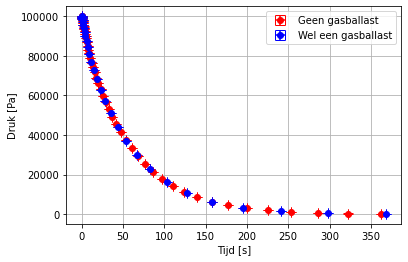

In [7]:
plt.errorbar(t1, p1, dp, dt, 'or', label='Geen gasballast', capsize=5)
plt.errorbar(t2, p2, dp, dt, 'ob', label='Wel een gasballast', capsize=5)
plt.legend()
plt.grid()
plt.xlabel('Tijd [s]')
plt.ylabel('Druk [Pa]')
plt.savefig('Proef7 metingen1.pdf', dpi=300, bbox_inches='tight')

In [10]:
popt1, pcov1 = curve_fit(func, t1, p1, p0=(100000, -1))
popt1_, pcov1_ = curve_fit(lambda t, a, b: a*t+b, t1, np.log10(p1), p0=(100000, -1))
popt2, pcov2 = curve_fit(func, t2, p2, p0=(100000, -1))
popt2_, pcov2_ = curve_fit(lambda t, a, b: a*t+b, t2, np.log10(p2), p0=(100000, -1))
popt3, pcov3 = curve_fit(func, t3, p3-pe, p0=(100000, -1))
popt3_, pcov3_ = curve_fit(lambda t, a, b: a*t+b, t3, np.log10(p3-pe), p0=(100000, -1))
popt4, pcov4 = curve_fit(func, t4, p4-pe, p0=(100000, -1))
popt4_, pcov4_ = curve_fit(lambda t, a, b: a*t+b, t4, np.log10(p4-pe), p0=(100000, -1))

In [11]:
print(popt1_, popt2_, popt3_, popt4_)

[-0.00788639  4.99698298] [-0.00799299  4.99976014] [-0.00743947  4.93056604] [-0.00735934  4.93006836]


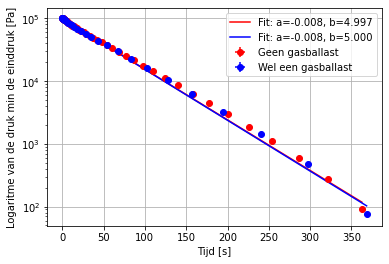

In [12]:
plt.errorbar(t1, p1, dp, dt, 'or', label='Geen gasballast')
plt.plot(t1, func(t1, *popt1), 'r-', label='Fit: a=%5.3f, b=%5.3f' % tuple(popt1_))
plt.errorbar(t2, p2, dp, dt, 'ob', label='Wel een gasballast')
plt.plot(t2, func(t2, *popt2), 'b-', label='Fit: a=%5.3f, b=%5.3f' % tuple(popt2_))
plt.legend()
plt.semilogy()
plt.xlabel('Tijd [s]')
plt.ylabel('Logaritme van de druk min de einddruk [Pa]')
plt.grid()
plt.savefig('Proef7 metingen2.pdf', dpi=300, bbox_inches='tight')


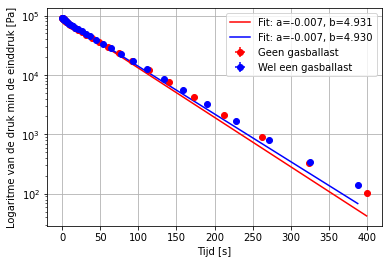

In [13]:
plt.errorbar(t3, p3-pe, dp, dt, 'or', label='Geen gasballast')
plt.plot(t3, func(t3, *popt3), 'r-', label='Fit: a=%5.3f, b=%5.3f' % tuple(popt3_))
plt.errorbar(t4, p4-pe, dp, dt, 'ob', label='Wel een gasballast')
plt.plot(t4, func(t4, *popt4), 'b-', label='Fit: a=%5.3f, b=%5.3f' % tuple(popt4_))
plt.legend()
plt.semilogy()
plt.xlabel('Tijd [s]')
plt.ylabel('Druk min de einddruk [Pa]')
plt.grid()
plt.savefig('Proef7 metingen3.pdf', dpi=300, bbox_inches='tight')

In [14]:
def find_S(popt_):
    return -2.3*V_kamer*popt_[0]

In [15]:
S1 = find_S(popt1_)
S2 = find_S(popt2_)
S3 = find_S(popt3_)
S4 = find_S(popt4_)

In [16]:
print("{:.1e}".format(S1), "{:.1e}".format(S2), "{:.1e}".format(S3), "{:.1e}".format(S4))

9.0e-04 9.1e-04 8.5e-04 8.4e-04
